In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [5]:
df.isnull().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

In [6]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [7]:
df.describe(include='object')

,name,date_of_event,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11124,11124,11124,11124,11124,11124,11124,11104,9694,11056,11056,10833,5871,11124,10844
unique,11083,2405,4,494,20,3,2593,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,2008-12-27,Palestinian,Gaza City,Gaza,Gaza Strip,2008-12-27,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,23,357,10092,2232,2435,7733,341,9681,4653,2283,2453,9849,2877,10000,113


# Feature Engineering.

In [11]:
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

In [9]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4661 entries, 6 to 11121
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          4661 non-null   object        
 1   date_of_event                 4661 non-null   datetime64[ns]
 2   age                           4661 non-null   float64       
 3   citizenship                   4661 non-null   object        
 4   event_location                4661 non-null   object        
 5   event_location_district       4661 non-null   object        
 6   event_location_region         4661 non-null   object        
 7   date_of_death                 4661 non-null   datetime64[ns]
 8   gender                        4661 non-null   object        
 9   took_part_in_the_hostilities  4661 non-null   object        
 10  place_of_residence            4661 non-null   object        
 11  place_of_residence_district   4661

In [16]:
df['type_of_injury'].value_counts()

type_of_injury
gunfire             4181
explosion            452
shelling              13
stabbing              13
house demolition       2
Name: count, dtype: int64

# Types of fires

In [18]:
df['ammunition'].value_counts()

ammunition
missile                        2757
shell                           655
live ammunition                 586
explosive belt                  309
bomb                            209
mortar fire                      43
flechette shells                 19
phosphorus shell                 16
car bomb                         15
knife                            13
rubber-coated metal bullets      13
teargas canister                 10
Qassam rocket                     7
grad rocket                       5
grenade                           2
flare bomb                        1
stun grenade                      1
Name: count, dtype: int64

# Group data by 'gender' and visualize


<AxesSubplot: xlabel='gender'>

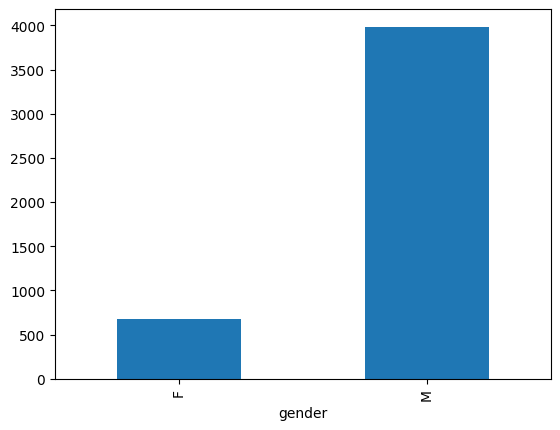

In [24]:
df.groupby('gender')['gender'].count().plot(kind='bar')

# Calculate summary statistics for 'age'

In [28]:
df.age.describe()

count    4661.000000
mean       26.977044
std        14.363839
min         1.000000
25%        18.000000
50%        23.000000
75%        32.000000
max        91.000000
Name: age, dtype: float64

# Group data by 'event_location_region' and count incidents

In [29]:
df['event_location_region'].value_counts()

event_location_region
Gaza Strip    4004
Israel         398
West Bank      259
Name: count, dtype: int64

<AxesSubplot: xlabel='event_location_region'>

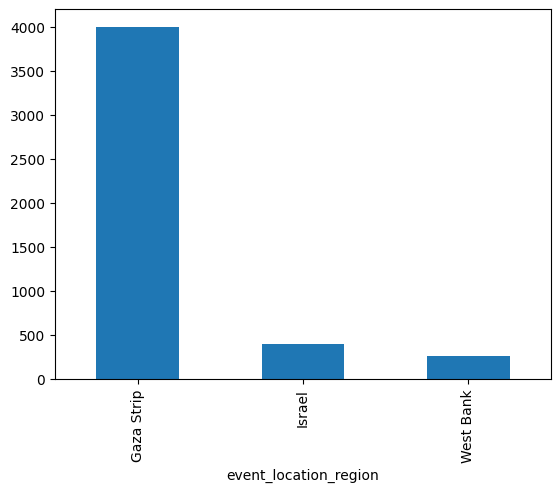

In [30]:
df['event_location_region'].value_counts().plot(kind='bar')

 # Count unique values of 'place_of_residence' within each region

<AxesSubplot: xlabel='event_location_region'>

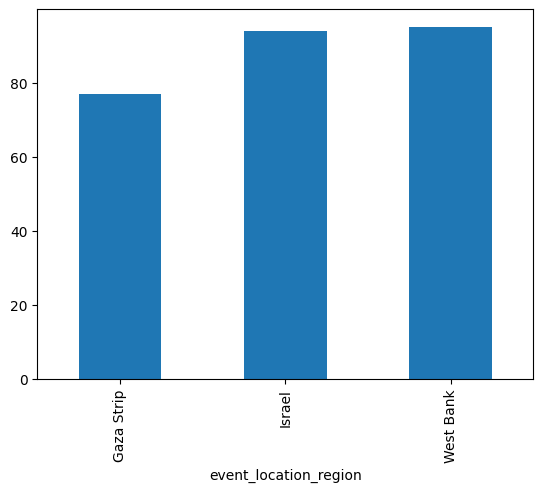

In [35]:
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='bar')

# Calculate average age by 'event_location_region'


In [37]:
df.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    25.894106
Israel        37.927136
West Bank     26.891892
Name: age, dtype: float64

# Visualize the types of injuries using Matplotlib

<AxesSubplot: xlabel='type_of_injury'>

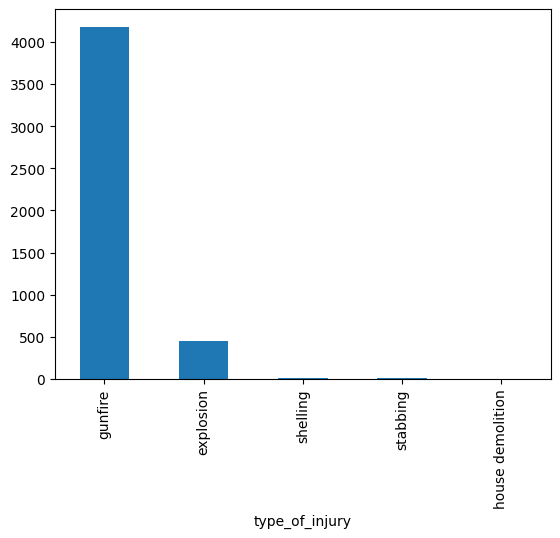

In [42]:
df['type_of_injury'].value_counts().plot(kind='bar')

# Grouping by 'citizenship' to find out how many incidents involve each nationality
citizenship_group = df.groupby('citizenship').size().reset_index(name='incident_count')

In [43]:
# df.groupby('citizenship').size().reset_index(name='incident_count')
def nationality_incident(df):
    nationalityIncident = df.groupby('citizenship').size().reset_index(name='incident_count')
    return nationalityIncident
nationality_incident(df)

,citizenship,incident_count
0,Israeli,502
1,Palestinian,4159


 # Data filtering example: Incidents in a specific region with specific characteristics

In [44]:
df[(df['event_location_region']=='West Bank') & (df['type_of_injury']=='gunfire')]

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
4325,Ben Yosef Livnat,2011-04-24,24.0,Israeli,Nablus,Nablus,West Bank,2011-04-24,M,Israelis,Jerusalem,Israel,gunfire,live ammunition,Palestinian civilians,Killed by Palestinian police officers when he ...
4370,Ruth Fogel,2011-03-11,35.0,Israeli,Itamar,Nablus,West Bank,2011-03-11,F,Israelis,Itamar,Nablus,gunfire,live ammunition,Palestinian civilians,"Two armed Palestinians killed her, her husband..."
4423,Kochava Evin Haiem,2010-08-31,33.0,Israeli,Bani Na'im,Hebron,West Bank,2010-08-31,F,Israelis,Beit Hagai,Hebron,gunfire,live ammunition,Palestinian civilians,Killed with three other civilians by gunfire o...
4424,Talia Imas,2010-08-31,45.0,Israeli,Bani Na'im,Hebron,West Bank,2010-08-31,F,Israelis,Beit Hagai,Hebron,gunfire,live ammunition,Palestinian civilians,Killed with her husband and two other civilian...
4425,Yitzhak Imas,2010-08-31,47.0,Israeli,Bani Na'im,Hebron,West Bank,2010-08-31,M,Israelis,Beit Hagai,Hebron,gunfire,live ammunition,Palestinian civilians,Killed with his wife and two other civilians b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11111,Sarah Lisha,2000-11-13,42.0,Israeli,Ofra,Ramallah and al-Bira,West Bank,2000-11-13,F,Israelis,Halamish,Ramallah and al-Bira,gunfire,live ammunition,Palestinian civilians,Killed while driving in her car.
11116,Eish Kodesh Gilmor,2000-10-30,25.0,Israeli,East Jerusalem,East Jerusalem,West Bank,2000-10-30,M,Israelis,Mevo Modi'im,Israel,gunfire,live ammunition,Palestinian civilians,Killed while he was guarding a National Insura...
11118,Marik Gavrilov,2000-10-27,25.0,Israeli,Ramallah,Ramallah and al-Bira,West Bank,2000-10-27,M,Israelis,Banei Ayish,Israel,gunfire,live ammunition,Palestinian civilians,His body was found burnt in his car.
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.


# Grouping by 'gender' to analyze how incidents vary between males and females
gender_group = df.groupby('gender').size().reset_index(name='incident_count')

In [45]:
df.groupby('gender').size().reset_index(name='incident_count')

,gender,incident_count
0,F,676
1,M,3985


# Combining grouping and filtering (example: average age of males and females from a specific nationality involved in specific injuries)


In [46]:
df[(df['citizenship'] == 'Palestinian') & (df['type_of_injury'] == 'stones throwing')].groupby('gender')['age'].mean()

Series([], Name: age, dtype: float64)